In [1]:
pip install pandas-datareader

In [2]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
print(yf.__version__) 

0.2.65


In [4]:
df = yf.download('BTC-USD', start='2023-01-01', end='2025-08-05')
print("DataFrame shape:", df.shape)
print("DataFrame head:", df.head())

C:\Users\HP\AppData\Local\Temp/ipykernel_10756/2551678436.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2023-01-01', end='2025-08-05')
[*********************100%***********************]  1 of 1 completed

DataFrame shape: (947, 5)
DataFrame head: Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-01-01  16625.080078  16630.439453  16521.234375  16547.914062   
2023-01-02  16688.470703  16759.343750  16572.228516  16625.509766   
2023-01-03  16679.857422  16760.447266  16622.371094  16688.847656   
2023-01-04  16863.238281  16964.585938  16667.763672  16680.205078   
2023-01-05  16836.736328  16884.021484  16790.283203  16863.472656   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-01-01   9244361700  
2023-01-02  12097775227  
2023-01-03  13903079207  
2023-01-04  18421743322  
2023-01-05  13692758566  


In [5]:
print(df.isna().sum())  # Check for missing values in each column

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [6]:
import yfinance as yf
symbol = 'BTC-USD'
start_date = '2023-01-01'
end_date = '2025-08-05'
df = yf.download(symbol, start=start_date, end=end_date)
print("DataFrame shape:", df.shape)
print("DataFrame head:", df.head())

C:\Users\HP\AppData\Local\Temp/ipykernel_10756/3084176221.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

DataFrame shape: (947, 5)
DataFrame head: Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-01-01  16625.080078  16630.439453  16521.234375  16547.914062   
2023-01-02  16688.470703  16759.343750  16572.228516  16625.509766   
2023-01-03  16679.857422  16760.447266  16622.371094  16688.847656   
2023-01-04  16863.238281  16964.585938  16667.763672  16680.205078   
2023-01-05  16836.736328  16884.021484  16790.283203  16863.472656   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-01-01   9244361700  
2023-01-02  12097775227  
2023-01-03  13903079207  
2023-01-04  18421743322  
2023-01-05  13692758566  


In [7]:
print(df.isna().sum())  # Check for missing values in each column

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [15]:
import math 
import numpy as np 
import pandas as pd 
from datetime import date, timedelta 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
import tensorflow as tf
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# check the tensorflow version and the number of available GPUs
print('Tensorflow Version: ' + tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Tensorflow Version: 2.17.0
Num GPUs: 0


In [17]:
# Setting the timeframe for the data extraction
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = '2021-12-22'

# Getting BTC-USD quotes
stockname = 'Bitcoin'
symbol = 'BTC-USD'

import yfinance as yf
df = yf.download(symbol, start=start_date, end=end_date)
# Handle dropna for possible MultiIndex
if isinstance(df.columns, pd.MultiIndex):
    df = df.dropna(subset=[('Close', symbol)])
else:
    df = df.dropna(subset=['Close'])

# Taking a look at the shape of the dataset
print(df.shape)
df.head(5)

C:\Users\HP\AppData\Local\Temp/ipykernel_1516/2568517557.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

(1324, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-12-22,48628.511719,49544.796875,48450.941406,48937.097656,24447979559
2021-12-23,50784.539062,51332.339844,48065.835938,48626.343750,28223878108
2021-12-24,50822.195312,51814.027344,50514.496094,50806.050781,24367912228
2021-12-25,50429.859375,51176.597656,50236.707031,50854.917969,19030650914
2021-12-26,50809.515625,51196.378906,49623.105469,50428.691406,20964372926


In [18]:
print(df.isna().sum())  # Check for missing values in each column

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


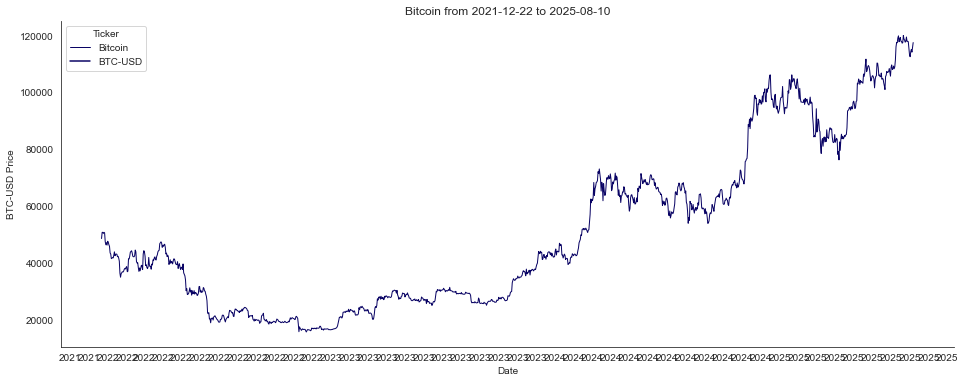

In [19]:
# Creating a Lineplot
months = mdates.MonthLocator() 
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(months)
ax1.legend([stockname], fontsize=12)
plt.title(stockname + ' from '+ start_date + ' to ' + end_date)
sns.lineplot(data=df['Close'], label=stockname, linewidth=1.0)
plt.ylabel('BTC-USD Price')
plt.show()

In [20]:
print("DataFrame columns:", df.columns)
print("First 5 rows of df:\n", df.head())
print("Last 5 rows of df:\n", df.tail())
print("NaN counts in all columns:\n", df.isna().sum())

DataFrame columns: MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
First 5 rows of df:
 Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2021-12-22  48628.511719  49544.796875  48450.941406  48937.097656   
2021-12-23  50784.539062  51332.339844  48065.835938  48626.343750   
2021-12-24  50822.195312  51814.027344  50514.496094  50806.050781   
2021-12-25  50429.859375  51176.597656  50236.707031  50854.917969   
2021-12-26  50809.515625  51196.378906  49623.105469  50428.691406   

Price            Volume  
Ticker          BTC-USD  
Date                     
2021-12-22  24447979559  
2021-12-23  28223878108  
2021-12-24  24367912228  
2021-12-25  19030650914  
202

In [21]:
print("Any non-NaN values in Close:", df['Close'].notna().any())
print("Sample of non-NaN Close values:\n", df[df['Close'].notna()]['Close'].head())
print("Sample of non-NaN Close values:\n", df[df['Close'].notna()]['Close'].tail())

Any non-NaN values in Close: Ticker
BTC-USD    True
dtype: bool
Sample of non-NaN Close values:
 Ticker           BTC-USD
Date                    
2021-12-22  48628.511719
2021-12-23  50784.539062
2021-12-24  50822.195312
2021-12-25  50429.859375
2021-12-26  50809.515625
Sample of non-NaN Close values:
 Ticker            BTC-USD
Date                     
2025-08-02  112526.914062
2025-08-03  114217.671875
2025-08-04  115071.882812
2025-08-05  114141.445312
2025-08-07  117496.898438


In [22]:
print("Date range:", df.index.min(), "to", df.index.max())
expected_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
print("Expected days:", expected_days, "Actual rows:", df.shape[0])

Date range: 2021-12-22 00:00:00 to 2025-08-07 00:00:00
Expected days: 1328 Actual rows: 1324


In [23]:
# Feature Selection - Only Close Data
# Handle MultiIndex columns
if isinstance(df.columns, pd.MultiIndex):
    train_df = df[[('Close', 'BTC-USD')]].copy()
    train_df.columns = ['Close']  # Rename to 'Close'
else:
    train_df = df[['Close']].copy()
train_df = train_df.dropna()  # Remove any NaN values

print("train_df shape:", train_df.shape)
print("NaN in train_df:", train_df.isna().sum())

train_df shape: (1324, 1)
NaN in train_df: Close    0
dtype: int64


In [24]:
data_unscaled = train_df.values
print("NaN in data_unscaled:", np.isnan(data_unscaled).sum())

NaN in data_unscaled: 0


In [25]:
# Get the number of rows to train the model on 80% of the data 
train_data_length = math.ceil(len(data_unscaled) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unscaled)
print("NaN in np_data:", np.isnan(np_data).sum())

NaN in np_data: 0


In [26]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 20

# Prediction Index
index_Close = train_df.columns.get_loc("Close")
print(index_Close)

0


In [27]:
# Create the training and test data
train_data = np_data[0:train_data_length, :]
test_data = np_data[train_data_length - sequence_length:, :]

# Partition dataset for the RNN
def partition_dataset(sequence_length, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_length, data_len):
        x.append(train_df[i-sequence_length:i,:]) # Contains sequence_length values 0-sequence_length * columns
        y.append(train_df[i, index_Close]) # Contains the prediction values for validation (3rd column = Close), for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
print(x_test[1][sequence_length-1][index_Close])
print(y_test[0])

(1040, 20, 1) (1040,)
(264, 20, 1) (264,)
0.7175178411405773
0.7175178411405773


Epoch 1/150


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0132
Epoch 2/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 3/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 4/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0011
Epoch 5/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011
Epoch 6/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.5109e-04
Epoch 7/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.6712e-04
Epoch 8/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.5964e-04
Epoch 9/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 6.4717e-04
Epoch 10/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 8.1103e-04
Epoch 11/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.8885e-04
Epoch 12/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 6.7059e-04
Epoch 13/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.1304e-04
Epoch 14/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.9355e-04
Epoch

130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.4641e-04
Epoch 78/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.9506e-04
Epoch 79/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.0325e-04
Epoch 80/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3193e-04
Epoch 81/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.7364e-04
Epoch 82/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.4083e-04
Epoch 83/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.9252e-04
Epoch 84/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.2157e-04
Epoch 85/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3622e-04
Epoch 86/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.3672e-04
Epoch 87/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.8376e-04
Epoch 88/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.0954e-04
Epoch 89/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.8690e-04
Epoch 90/150
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/s

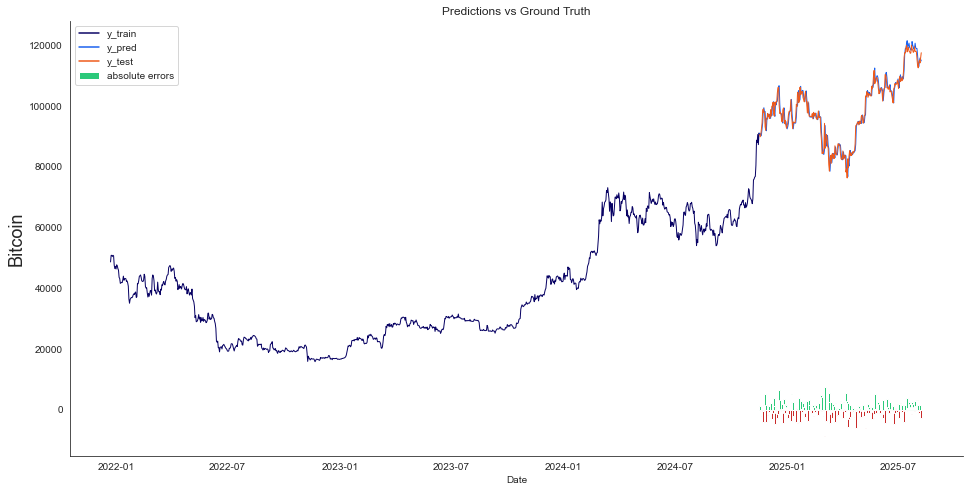

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The last known close price for Bitcoin (as of 2025-08-07) was 117496.9
The predicted close price for the next day is 118347.28125 (+0.72%)


In [28]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Configure the neural network model
model = Sequential()

neurons = sequence_length

# Model with sequence_length Neurons 
# inputshape = sequence_length Timestamps
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=8, epochs=150)

# Get the predicted values
y_pred_scaled = model.predict(x_test)
y_pred = mmscaler.inverse_transform(y_pred_scaled)
y_test_unscaled = mmscaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')
# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')
# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

# The date from which on the date is displayed
display_start_date = "2021-12-22" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(train_df[:train_data_length + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(train_df[train_data_length:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=True)
plt.title("Predictions vs Ground Truth")
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
plt.ylabel(stockname, fontsize=18)
sns.lineplot(data=df_union_zoom[['y_train', 'y_pred', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the barplot for the absolute errors
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='absolute errors', color=df_sub)
plt.legend()
plt.show()

# Get fresh data
if isinstance(df.columns, pd.MultiIndex):
    df_new = df[[('Close', symbol)]].copy()
    df_new.columns = ['Close']  # Rename to 'Close'
else:
    df_new = df[['Close']].copy()
df_new = df_new.dropna()

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_days_scaled = mmscaler.transform(df_new[-sequence_length:].values)

# Create an empty list and Append past n days
X_test = []
X_test.append(last_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price_unscaled = mmscaler.inverse_transform(pred_price)

# Print last price and predicted price for the next day
last_date = df_new.index[-1].date()
price_today = round(df_new['Close'][-1], 2)
predicted_price = round(pred_price_unscaled.ravel()[0], 2)
percent_change = round((predicted_price * 100)/price_today - 100, 2)

prefix = '+' if percent_change > 0 else ''
print(f'The last known close price for {stockname} (as of {last_date}) was {price_today}')
print(f'The predicted close price for the next day is {predicted_price} ({prefix}{percent_change}%)')

In [29]:
y_test_unscaled = mmscaler.inverse_transform(y_test.reshape(-1, 1))
avg_test_price = np.mean(y_test_unscaled)
print(f"Average test set price: ${avg_test_price:.2f}")
print(f"MAE as percentage of avg test price: {(MAE / avg_test_price * 100):.2f}%")

Average test set price: $98925.14
MAE as percentage of avg test price: 1.66%
